The objective for Data Analysis: I will be assuming the role of a data analyst in an e-commerce company that operates overall multiple regions with multiple product skews. The goal of this data analysis is to understand more about the sales performance of various products.
The data analysis will take three steps:
Step 1: Cleaning the data.
	This will involve removing missing values and outliers.
Step 2: Transforming the data.
	This will involve adding new columns and modifying data to make it easier for analysis.
Step 3: Analyzing the data.
	This will involve analyzing the data at an overall VP level and analyzing the data at a regional sales manager level.
Each step will have its own description before it starts. Furthermore, each line of code will be annotated to explain its purpose. Also any assumptions that are made will be stated.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats

The above line of code is necessary to import pandas, seaborn, numpy, matplotlib, math, and scipy numpy which are the packages required for this analysis.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ajkam/schulich_data_science/main/Assignments/sales_data%20(1)%20-%20Copy.csv")

The above line of code is used to read the excel file store on github and store into a dataframe titled 'df'. 

In [ ]:
df

print the dataframe

In [ ]:
df.info()

display info on the dataframe

In [ ]:
df.describe(include='all')

describe some statistics regarding the datrame

# Step 1: Cleaning the data.

The data analysis will help the sales managers and sales VP come up with an efficient strategy for the 2025 sales year. Before coming up with those questions to answer, visualizing observations, and recommending actions, I will start by cleaning the dataset. 

The idea of cleaning this dataset is to ensure that someone coming into this code for the first time will be able to understand precisely what variables I removed and why I did so. I would also like the guarantee that if they need to make modifications to my analysis due to new information on values or rerun the same analysis for themselves, they will have the means to do so within the code.

The issue of tackling missing data will be solved by deciding to replace and fill in the values.
If the missing data is numerical then the data should be filled with an appropriate value-based central limit theory. This is because it will not affect the spread of the data. 

If the missing data is categorical, then the data should be removed for the purpose of the analysis. This is because filling these values with an appropriate value based on the central limit theory would affect the spread of data without contributing additional insights as the soultion would be to add new categorical variables for undefined and missing values.

The next part would be to take care of outliers. To identify if there are outliers histograms, boxplots, and scatterplots will be used to determine if the data has outliers. Then based on central limit theory they will be removed from the analysis.


In [ ]:
column_dict = {'Product':'product_sku', 'Region':'region','Price':'price_per_unit', 
               'Units Sold':'units_sold','Sale Date':'sale_date' }
df= df.rename(columns=column_dict)
df

Create a list of  the old column headings and new easier to work with headings
use the rename function to replace the column headings. Note that an assumption was made that the Price column represented price per unit.

In [ ]:
df.isna().sum()

Use the isna function to check if their any missing values in each column and sum the total number of missing values.

In [ ]:
print(df.isna().any())


Use the boolean function .any to check if the dataframe columns has any missing values so its easy to compare with down the line.

In [ ]:
print(df.isnull())

Print the data set with the boolean function isnull to see true and false for where data is missing.

In [ ]:
sns.histplot(df['units_sold'])

Create a histogram for the units_sold column to see how it is distributed. Based on the output it seems that is normally distributed with no skewness.

In [ ]:
data =df['units_sold']


Create a temporary dataframe called data with the units sold column to check kurtosis and skewness.

In [ ]:
print("Kurtosis (scipy): ", scipy.stats.kurtosis(data, fisher=True))


Use the scipy.stats.kurtosis to check the kurtosis value.
Since it is positive yet very close to zero the data is very slightly peaked.

In [ ]:
def skewness(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    std_dev = math.sqrt(variance)
    
    skewness = sum((x - mean) ** 3 for x in data) / (n * std_dev ** 3)
    return skewness

Create a formula using the length of the data, the mean of the data divided by length, the variance which is calculated by getting the total sum of squares, and then the standard deviation which is the square root of variance. The used the sum along with power to the cubed to return skewness.

In [ ]:
print(skewness(data))


Based on the above return the skewness. Since the skew is between -0.5 and 0.5 that data is not skewed positively or negatively.

In [ ]:
units_sold_mean = df['units_sold'].mean()


Since it is normally distriubted with no skewness I have determined the best approach is to fill the missing data with the mean. So this function uses the .mean() function to get the mean of units sold and store the value in units_sold_mean.

In [ ]:
df['units_sold'].fillna(value=units_sold_mean, inplace= True)

This uses the fillna function to replace empty values in units_sold with the units_sold_mean value. The inplace argument is left as True so the change is permanent.

In [ ]:
sns.histplot(df['units_sold'])

We dispaly the histogram again to view the change as a new column that is over a count of 200 is a direct result of filling in the missing values we saw earlier.

In [ ]:
df.describe(include='all')

We run the describe function to check if the mean has changed and it has not.

In [ ]:
sns.histplot(df['price_per_unit'])

Create a histogram for the price_per_unit column to see how it is distributed. Based on the output it seems that the data skewed to the left.

In [ ]:
data2 =df['price_per_unit']

Create a temporary dataframe called data2 with the price_per_unit column to check kurtosis and skewness.

In [ ]:
print("Kurtosis (scipy): ", scipy.stats.kurtosis(data2, fisher=True))

Use the scipy.stats.kurtosis to check the kurtosis value.
Since it is positive and greater than 3 this indicates a leptokurtic distriubtion. This means the data has very thick tails, with a high concentration of data around the tails, and there is a high chance of outliers. This means we should be careful when removing outliers.

In [ ]:
def skewness(data2):
    n = len(data2)
    mean = sum(data2) / n
    variance = sum((x - mean) ** 2 for x in data2) / n
    std_dev = math.sqrt(variance)
    
    skewness = sum((x - mean) ** 3 for x in data2) / (n * std_dev ** 3)
    return skewness

Create a formula using the length of the data, the mean of the data divided by length, the variance which is calculated by getting the total sum of squares, and then the standard deviation which is the square root of variance.

The calculate the skewneness which is sum each datapoint subratec the mean cubed divied by the standard deviation.

In [ ]:
print(skewness(data2))

Based on the above return the skewness. Since the skew is greater than 1 the data is extremely positivley skewed. This means that there is a huge tail on the right hand side of the data.

In [ ]:
price_per_unit_median = df['price_per_unit'].median()

Since there the data is extremely positively skewed I have determined the best approach is to fill the missing data with the median. So this function uses the .median() function to get the median of price_per_unit and store the value in price_per_unit_median

In [ ]:
df['price_per_unit'].fillna(value=price_per_unit_median, inplace= True)

This uses the fillna function to replace empty values in price_per_unit with the price_per_unit_median value. The inplace argument is left as True so the change is permanent.

In [ ]:
sns.histplot(df['price_per_unit'])

We dispaly the histogram again to view the change as a large column that is over a count of 175 that is a direct result of filling in the missing values we saw earlier.

In [ ]:
df.describe(include='all')

We run the describe function to check if the mean has changed and it has but only 3 units of the currency the price is in.

In [ ]:
df.drop_duplicates(inplace=True)

We use the drop_duplicates value to see drop any values that are the exact same. This is to account for any entry error.

In [ ]:
print(df.isna().any())

We print to ensure the values we just filled are in the dataset. Since price_per_unit and units_sold return false they have been filled.

In [ ]:
df_storage = df['product_sku'].fillna("sku_undefined")
df_storage = df['region'].fillna("region_missing")

This code fills the missing product_sku and missing region with text values and stores them in a dataset in df_storage. This is so if someone from the internal side of the company can look in the code fill in those missing variables and re run the dataset they can do it within the code. They would not have to input the values into the excel stored on github as they could enter them directly into df_storage.

In [ ]:
print(df.isna().any())


This code checks to ensure that product_sku and regions are still missing values in 'df'. This is because we do not believe they are unusable for the analysis detailed at the beginning due to the missing values.

In [ ]:
print(df_storage.isna().any())

This code checks that dataframe storage has no missing values.

In [ ]:
df.dropna(inplace=True)

This code then drops the missing values in product_sku and region. This is because I do not believe this data is useful for the data analysis. If they are listed as underfined and other they will not contribute to making insights for specific product performance. 

In [ ]:
df

We print the dataframe again cause we have not seen it in awhile just to check.

In [ ]:
print(df.isna().any())

This code checks that dataframe 'df' has no missing values.

In [ ]:
df.info()

We print some basic info that mainly shows us that we are now at 810 entries from the initial 1050. This means we have cleared about 240 entries from the data.

In [ ]:
df.describe(include='all')

We print some statistics and see that our mean for both units_sold and price_per_unit have changed slightly.

In [ ]:
sns.histplot(df['price_per_unit'])

We noticed above that their was an outlier in the histogram and now we are going to treat it.

In [ ]:
df[df['price_per_unit']>2000]

We isolate for any indexes above 2000 and we find index 969.

In [ ]:
df.drop(969, axis=0, inplace=True)

We drop index 969 from the dataplace permanently with the drop function and inplace = True.

In [ ]:
sns.histplot(df['price_per_unit'])

We print our new histogram to see that we have removed the outlier.

In [ ]:
sns.histplot(df['units_sold'])

We repeat the same process with units_sold to check for outliers.

In [ ]:
df[df['units_sold']>20]

We isolate for indexes above 20 and find index 719.

In [ ]:
df.drop(719, axis=0, inplace=True)

We drop index 969 from the dataplace permanently with the drop function and inplace = True.

In [ ]:
sns.histplot(df['units_sold'])

We print our new histogram to see that we have removed the outlier.

In [ ]:
sns.boxplot(data = df, x = 'price_per_unit')

We print a boxplot to check if their are any more outliers in the data. We come across a lot of data being greater than 300 which approximatley the upper extreme of the whisker.

In [ ]:
df[df['price_per_unit']>300]

We isolate those under 300 and determine there are a lot of indices above 300 and decide to come back to analyze it further using a different plot.

In [ ]:
sns.boxplot(data = df, x = 'units_sold')

We create a boxplot of the units_sold which presents a more reasonable boxplot since it is normally distributed.

In [ ]:
df[df['units_sold']>18]

We isolate for units above the upper extreme and find some indices.

In [ ]:
df.drop(df[df['units_sold']>18].index, axis=0, inplace=True)


We decide to use the drop function to permanently drop all indices that met the boolean of being greater than 18 using inpalce=True to make it permanent.

In [ ]:
sns.boxplot(data = df, x = 'units_sold')

We remake the boxplot to show no more outliers.

In [ ]:
sns.scatterplot(data=df, x='units_sold',y='price_per_unit')

We create a scatterplot to see if we can further find outliers in price_per_unit or if the boxplot was just misdjuding due the data being skewed to the left.

In [ ]:
sns.lmplot(data=df, x='price_per_unit',y='units_sold', fit_reg=True)

We create a scatterplot with a line of best and a different orientation to see if we can further enhance the findings from the scatterplot.

In [ ]:
df[df['price_per_unit']>550]

Based on the two scatterplots and the boxplot there seems to be a cluster data from 300 to 550. However past 550 there are only a few datapoints. Therefore the conclusion is to isolate for indices greater than 550.

In [ ]:
df.drop(df[df['price_per_unit']>550].index, axis=0, inplace=True)

This conclusion seems much more reasonable than the number of outliers concluded from the sole analysis of the boxplot. Therefore we will use the drop function to permanaently drop any index above 550 using inplace=True to ensure it is permanent.

In [ ]:
sns.lmplot(data=df, x='price_per_unit',y='units_sold', fit_reg=True)

We reprint scatter plot with line of best fit to ensure the data looks good.

In [ ]:
df.info()

We run the info function to determine that we now have 799 entries. This means we have cleaned about 11 entries from the 810. In total we have cleaned 11+240=251 entries from the orignal data set of 1050 entries.

In [ ]:
df.describe(include='all')

Now that we have removed our outliers we can see that the units_sold mean has marginally changed from the initial 10.04 to 10.03. While the price_per_unit mean slightly decreased from the initial 107.59 to 98.03. We make a careful note that this was due to removing & filling missing data, dropping duplicates, removing outliers.

# Step 2 Tranforming the data
I will transform the data based on the following questions I want to answer. Then I will use the data to visualize the observations. These observations will take two categories. Firstly, the data of summary statistics will be organized and visualized to figure out the big-picture decisions on a department-wide and regional sales level. Secondly, specific product-by-region recommendations will be made according to the recommendation matrix to find the specific fixes for the sales performance of products on department-wide and regional sales levels. The table is located in the attached microsoft document.


In [ ]:
print(df['product_sku'].unique())

Firstly I want to prepare the data so that the labels are shorter and that they can be sorted numerically so I am going to print a unique list of product_sku.

In [ ]:

df = df.replace(['Product_46', 'Product_36', 'Product_17', 'Product_45', 'Product_31',
 'Product_18', 'Product_16', 'Product_9', 'Product_20', 'Product_1',
 'Product_2', 'Product_3', 'Product_43', 'Product_33', 'Product_14',
 'Product_50', 'Product_6', 'Product_13', 'Product_11', 'Product_27',
 'Product_28', 'Product_24', 'Product_34', 'Product_25', 'Product_4',
 'Product_48', 'Product_10', 'Product_49', 'Product_12', 'Product_42',
 'Product_5', 'Product_26', 'Product_8', 'Product_37', 'Product_22',
 'Product_32', 'Product_23', 'Product_35', 'Product_15', 'Product_29',
 'Product_44', 'Product_47', 'Product_41', 'Product_39', 'Product_30',
 'Product_40', 'Product_21', 'Product_38', 'Product_19', 'Product_7'], [46, 36, 17, 45, 31,
 18, 16, 9, 20, 1,
 2, 3, 43, 33, 14,
 50, 6, 13, 11, 27,
 28, 24, 34, 25, 4,
 48, 10, 49, 12, 42,
 5, 26, 8, 37, 22,
 32, 23, 35, 15, 29,
 44, 47, 41, 39, 30,
 40, 21, 38, 19, 7]
)

df

Then I am going to replace the string Product_#X with the integer #X.

In [ ]:
df.sort_values(by=['product_sku'], ascending=True,inplace=True)
df

Then I am going to sort by product_sku.

In [ ]:
print(df['region'].unique())

I am going to do the same with the labels for Region starting printing a list of unique values.

In [ ]:
df = df.replace(['Region_3', 'Region_1', 'Region_6', 'Region_7', 'Region_9', 'Region_2',
 'Region_4', 'Region_5', 'Region_8', 'Region_10'], [3, 1, 6, 7, 9, 2,
 4, 5, 8, 10] 
)
df

I am replacing the string Region_#X with the integer #X.

In [ ]:
df.sort_values(by=['region'], ascending=True,inplace=True)
df

Then I am going to sort by region.

In [ ]:
columns_titles = ["region","product_sku","price_per_unit","units_sold","sale_date"]
df=df.reindex(columns=columns_titles)
df

I decided that for my analysis it would better to have region first so I reindexed the columns accordingly.

In [ ]:
print(df.groupby('product_sku')['units_sold'].mean())

In [ ]:
df['year_sold'] = pd.DatetimeIndex(df['sale_date']).year
df['month_sold'] = pd.DatetimeIndex(df['sale_date']).month
df['quarter_sold'] = pd.DatetimeIndex(df['sale_date']).quarter
df['sales_revenue'] = df['units_sold'] * df['price_per_unit']
df['CW_units_sold'] = df.groupby('product_sku')['units_sold'].transform('mean')
df['CW_price_per_unit'] = df.groupby('product_sku')['price_per_unit'].transform('mean')
df['CW_sales_revenue'] = df.groupby('product_sku')['sales_revenue'].transform('mean')
df['Dif_sales_revenue'] = (df['sales_revenue']- df['CW_sales_revenue'])/df['CW_sales_revenue']
df['Dif_price_per_unit'] = (df['price_per_unit']- df['CW_price_per_unit'])/df['CW_price_per_unit']
df['Dif_units_sold'] = (df['units_sold']- df['CW_units_sold'])/df['CW_units_sold']



df


The above columns will help me answer my questions in the big picture statistical summary and the detailed product by region recommendation.
The year_sold, month_sold, quarter_sold will help me output summary statistics grouped by a certain time period (year, month, and season/quarter).
The columns with the prefix CW are the company-wide averages of units_sold, price_per_unit, and sales_revenue.
The columns with the prefix Dif are the differential statistics based on much greater or less the units_sold, price_per_unit, and sales_revenue are to the CW versions in decimals.
The columns with the prefix mtr are the boolean operators to determine which scenario each sale falls into based on units_sold, sales_revenue, and price_per_unit. To create these columns I created a variable called conditions. Then I stated one condition if the differential is greater than zero to return the value "High", if equal to zero then return the value "Avg", and if less than zero to return the value "low" in the next condition. as specified in the matrix table attached.

# Step 3a: For the VP of sales, I plan to answer to following questions by extracting observations and providing recommendations for the business:

What is the overall performance of the company over the three years of data?
What quarter does the company have best/worst sales?
What was the company’s highest and lowest month?
What was the max and min sales for each year?



<Axes: xlabel='year_sold', ylabel='sales_revenue'>

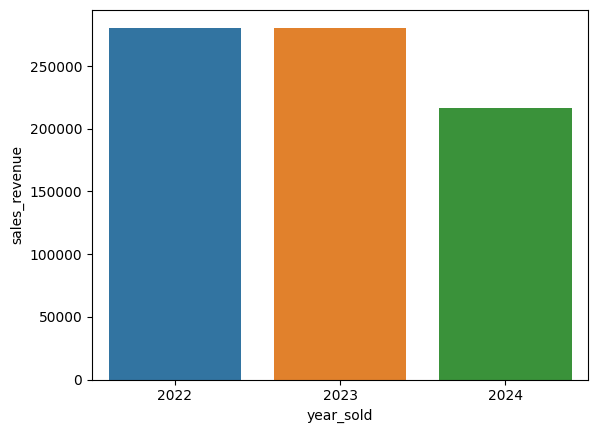

In [540]:
sns.barplot(x='year_sold',y='sales_revenue',data=df, estimator=sum, errorbar=None)


What is the overall performance of the company over the three years of data?

As shown by the data it is difficult so visualize from the barchart of the total revenue to see which year is performing the best. Note that 2024 data only goes up until the third quarter as it ends in September. Looking at the numerical values might help answer this question.

<Axes: xlabel='quarter_sold', ylabel='sales_revenue'>

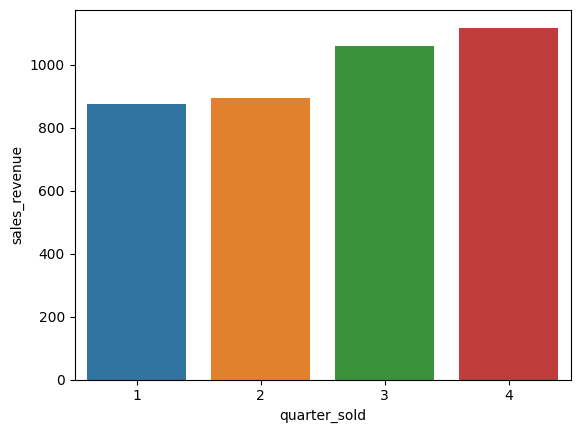

In [542]:
sns.barplot(x='quarter_sold',y='sales_revenue',data=df, errorbar=None)


What quarter does the company have best/worst sales?

Since the data from quarter 4 are missing in 2024. The average was used instead of the sum. This shows that the best quarter is quarter 4. This is important it shows that the last quarter might cause a rush as managers might be scrambling to increase sales as managers want to meet their bonuses. On the other hand the first quarter is the worst on average which demonstrates that after the end of the year sales managers might be relaxed for the first quarter of the new year. The VP of Sales should look into creating bonuses per quarter so regional sales managers are incentived throughout the entire year. However it is important to look into whether this is because sales managers being lax or just due to the holiday season. Typically ecommerce companies have a surge of sales during the Christmas season and then during January very few people are purchasing. Therfore, before deciding on implementing quarterly bonuses the gap between q1 and q4 should invesetigated further to see if it caused by managers or seasonality.

<Axes: xlabel='month_sold', ylabel='sales_revenue'>

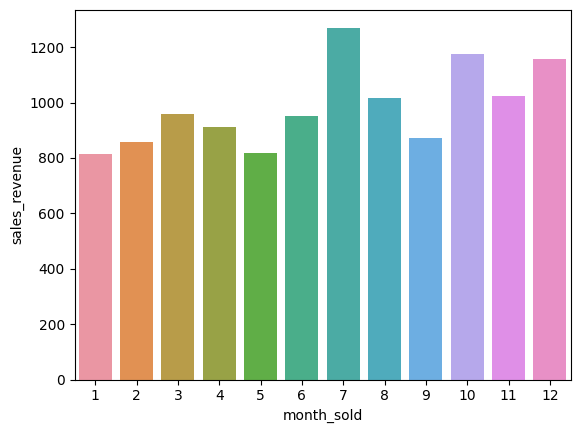

In [544]:
sns.barplot(x='month_sold',y='sales_revenue',data=df, errorbar=None)


What was the company’s highest and lowest month?

This graph visualizes the average sales revenue by month. The top 3 months are July, October, and December. This explains in the previous result why Q4 is the most successful as it has 2 of the top 3 months. The bottom fourr months are September, Jaunary, February, and May. This explains why Q1 is the lowest as it has 2 of the worst months. This again demonstrates the seasonal trend for company. However data from q4 2024 is not included. One recommendation for the VP of Sales might be to employ department wide promotions on the bottom 4 months. This might help increase units_sold although a lower price_per_unit.

In [548]:
df_2022 = df[df["year_sold"]==2022]
df_2022
print("The max sale for 2022 was " + str(df_2022['sales_revenue'].max()))
print("The min sale for 2022 was " + str(df_2022['sales_revenue'].min()))

df_2023 = df[df["year_sold"]==2023]
df_2023
print("The max sale for 2023 was " + str(df_2023['sales_revenue'].max()))
print("The min sale for 2023 was "+ str(df_2023['sales_revenue'].min()))

df_2024 = df[df["year_sold"]==2024]
df_2024
print("The max sale for 2024 was " + str(df_2024['sales_revenue'].max()))
print("The min sale for 2024 was " + str(df_2024['sales_revenue'].min()))

The max sale for 2022 was 5855.360000000001
The min sale for 2022 was 2.2
The max sale for 2023 was 5555.11
The min sale for 2023 was 0.99
The max sale for 2024 was 5100.6
The min sale for 2024 was 14.170000000000002


What was the max and min sales for each year?

The above cell outputs the min and max sale. This reveals some interesting data as their are some abnormally high sales and low sales. For example the min sales in 2023 is less than a dollar which means that price_per_unit was abnormlly low. This should be investigated as it shows that there is no standard guideline for how much discounts are allowed per product. The regional managers are completely out of wack when it comes to charging prices. There needs to be a standard set by the Vice President of Sales at least for a mininum price for each product as this would ensure that the company maeks a profit on each sale. This holds true as unless the 0.99 sale revenue in 2023 and the 2.2 sale revenue in 2022 were a clearance sale it is unlikely that there was a return on investment for those sales.  

In [554]:
df_2022_q1 = df[(df["year_sold"]==2022) & (df["quarter_sold"]==1)]
df_2022_q2 = df[(df["year_sold"]==2022) & (df["quarter_sold"]==2)]
df_2022_q3 = df[(df["year_sold"]==2022) & (df["quarter_sold"]==3)]
df_2022_q4 = df[(df["year_sold"]==2022) & (df["quarter_sold"]==4)]
print("The total sales for Q1 2022 was " + str(df_2022_q1['sales_revenue'].sum()))
print("The total sales for Q2 2022 was " + str(df_2022_q2['sales_revenue'].sum()))
print("The total sales for Q3 2022 was " + str(df_2022_q3['sales_revenue'].sum()))
print("The total sales for Q4 2022 was " + str(df_2022_q4['sales_revenue'].sum()))


df_2023_q1 = df[(df["year_sold"]==2023) & (df["quarter_sold"]==1)]
df_2023_q2 = df[(df["year_sold"]==2023) & (df["quarter_sold"]==2)]
df_2023_q3 = df[(df["year_sold"]==2023) & (df["quarter_sold"]==3)]
df_2023_q4 = df[(df["year_sold"]==2023) & (df["quarter_sold"]==4)]
print("The total sales for Q1 2023 was " + str(df_2023_q1['sales_revenue'].sum()))
print("The total sales for Q2 2023 was " + str(df_2023_q2['sales_revenue'].sum()))
print("The total sales for Q3 2023 was " + str(df_2023_q3['sales_revenue'].sum()))
print("The total sales for Q4 2023 was " + str(df_2023_q4['sales_revenue'].sum()))

df_2024_q1 = df[(df["year_sold"]==2024) & (df["quarter_sold"]==1)]
df_2024_q2 = df[(df["year_sold"]==2024) & (df["quarter_sold"]==2)]
df_2024_q3 = df[(df["year_sold"]==2024) & (df["quarter_sold"]==3)]
df_2024_q4 = df[(df["year_sold"]==2024) & (df["quarter_sold"]==4)]
print("The total sales for Q1 2024 was " + str(df_2024_q1['sales_revenue'].sum()))
print("The total sales for Q2 2024 was " + str(df_2024_q2['sales_revenue'].sum()))
print("The total sales for Q3 2024 was " + str(df_2024_q3['sales_revenue'].sum()))
print("The total sales for Q4 2024 was " + str(df_2024_q4['sales_revenue'].sum()))





The total sales for Q1 2022 was 54715.520422832975
The total sales for Q2 2022 was 59691.78164904862
The total sales for Q3 2022 was 78426.14697674419
The total sales for Q4 2022 was 87867.13570824525
The total sales for Q1 2023 was 65823.15940803383
The total sales for Q2 2023 was 70671.76143763213
The total sales for Q3 2023 was 75156.08617336152
The total sales for Q4 2023 was 68580.46644820296
The total sales for Q1 2024 was 73894.73274841438
The total sales for Q2 2024 was 69174.29687103594
The total sales for Q3 2024 was 73161.15659619455
The total sales for Q4 2024 was 0.0


What quarter does the company have best/worst sales?

This question was already answered with a visualization. However a recommendation of addng bonsuses per quarter to motivate managers was suggested.

For 2022 Q4 had the highest sales. For 2023 Q3 had the highest sales. For 2024 noting missing Q4 Q1 had the highest sales.

Depedning on how the data for Q4 turns it it seems that the highest sales are concentrated in Q3 and Q4. This would support the decision to have a quarterly bonus so the VP of sales can motivate the regional sales managers throughout the year.

In [559]:
print("The total sales for 2022 was " + str(df_2022['sales_revenue'].sum()))
print("The total sales for 2023 was " + str(df_2023['sales_revenue'].sum()))
print("The total sales for 2024 was " + str(df_2024['sales_revenue'].sum()))

x= (df_2022_q4['sales_revenue'].sum() + df_2023_q4['sales_revenue'].sum())/2
print(x)
print("If the company perfomrs at their average sales for the past two years they will surpass 2023 sales with a 2024 total of " + 
      str(x + df_2024['sales_revenue'].sum()))

The total sales for 2022 was 280700.58475687105
The total sales for 2023 was 280231.47346723045
The total sales for 2024 was 216230.18621564482
78223.8010782241
If the company perfomrs at their average sales for the past two years they will surpass 2023 sales with a 2024 total of 294453.9872938689


What is the overall performance of the company over the three years of data?

Earlier a visualization was used to attempt to answer this question. It was unclear because the first two datapoints were so close and the 2024 datapoint was much lower so the visualization scale was not able to demonstrate it properly. So the numeric data shows that sales decreased from 2022 to 2023 which shows a slight dip in performance. This means the changes the VP of Sales made in 2023 caused a dip in sales. The VP of sales should review department wide and regional sales strategy implemented in the calendar to see what caused the dip in sals.  However if their quarter 4 remains on track based on the average of the past two years they will surpass their performance. If they are able to surpass their performance it indicates the strategy changes they made in the 2024 calendar year were successful. However, if they are unable to surpass their performance it indicates that they still need to revise their sales strategy to remain competitive in the ecommerce industry.

# Step 3b: Which region has the most sales revenue and which has the least sales revenue?

This will be done by creating a sales revenue column by multiplying the price by the units sold.

Then I will output a bar chart to show the sales revenue by region sorted from least to greatest for each year. 

This will help identify the strategy for the VP of which key regions to target for the next year and which regions to pull back from. Also, to identify which regional managers to reward and which regional managers need more assistance and training.


<Axes: xlabel='region', ylabel='sales_revenue'>

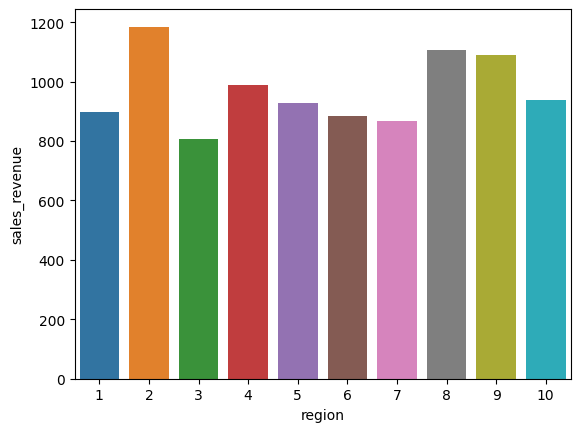

In [561]:
sns.barplot(x='region',y='sales_revenue',data=df, errorbar=None)


Overall performance demonstrating the average of sales revenue of each region for each year.
The top three regions based on average sales performance over the 2 years and 3 quarters of data is region 2, region 8 and region 9. The bottom three regions based on average sales performance over the 2 years and 3 quarters of data is region 3, region 6 and region 7.

This shows that the VP should target the top 3 regions as they have generated the most sales overall. The VP should also focus on phasing out operations from the bottom 3 regions. 



<Axes: xlabel='region', ylabel='sales_revenue'>

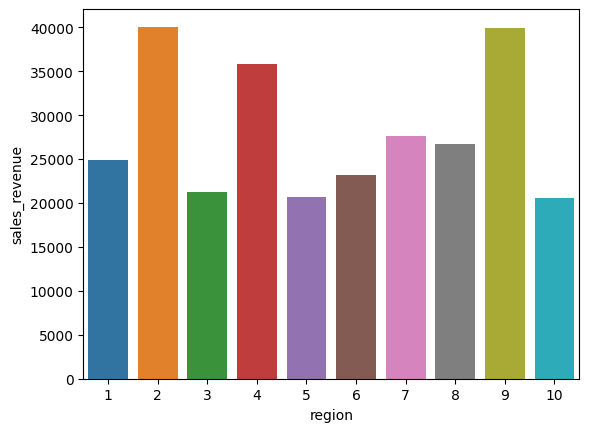

In [562]:
sns.barplot(x='region',y='sales_revenue',data=df_2022, estimator=sum, errorbar=None)


The manager performance will be evaluated by the sum of sales revenue for each year. This chart outputs those values 2022. The top performing regions are region 2, region 9, and region 4. This shows that these managers brought in the most sales that year. These managers should have been rewarded for conributing a lot to the company's sales revenue in 2022. On the oher hand region 3, reigon 5, and region 10 are the lowest in terms of sales revenue in 2022. This should be dealt with by offering traininng, incentives, and support to these managers so that they perform better in the future.

<Axes: xlabel='region', ylabel='sales_revenue'>

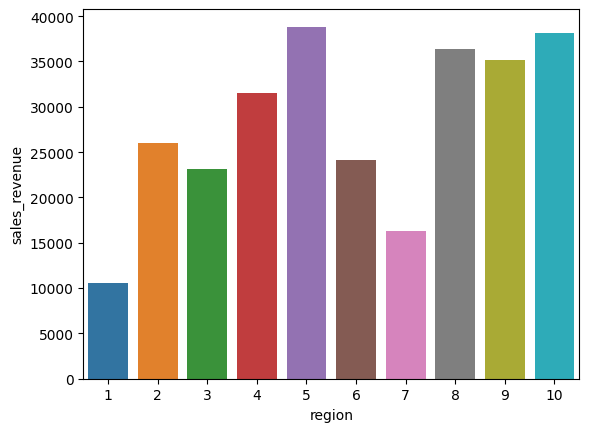

In [563]:
sns.barplot(x='region',y='sales_revenue',data=df_2023, estimator=sum, errorbar=None)


The manager performance will be evaluated by the sum of sales revenue for each year. This chart outputs those values 2023. According to the previous analysis conducted in part 3a there was a dip in sales from 2022 to 2023. This graph gives context as to what happenened region wise. Firstly yearly sales for region 1 dropped from approximatley 25000 in 20222 to 10000 in 2023. This has been the lowest sales_revenue so far. In addition the highest selling region, region 2, dropped from appoximately 39000 in sales_revenue to 27000.

The top performing regions are region 5, region 10, and region 8 which means none of the top 3 from 2022 remained. This could indicate that region 5, 8 and 10 adpated to make changes based on their last years performance for the 2023 calendar year. Region 10 went from a bottom 3 contender to a top 3 which shows major improvement either in managment style or demand in that region. The VP of Sales should determine whether these regions improved in demand or management style so that he can use the best practices from their improvement as lessons for the other regional managers.

On the flipside region 1, region 3, and region 7 are in the bottom 3. I think high attention needs to given from the VP of Sales into region 1 to discover the reason for the drop in sales. In addition, region 3 has been in the bottom two years in a row. At this point it might be time  for the VP of Sales to consider giving the regional sales manager in region 3 a performance review.


<Axes: xlabel='region', ylabel='sales_revenue'>

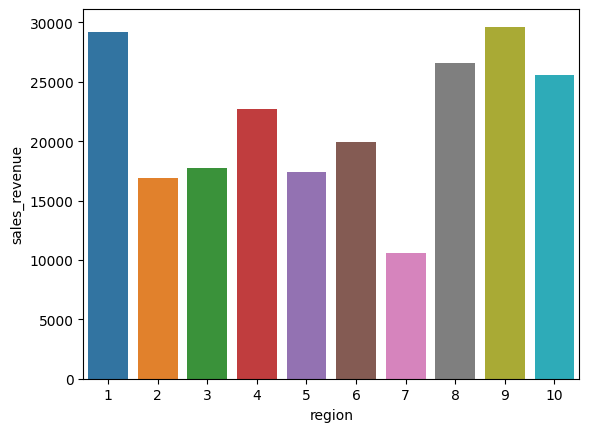

In [564]:
sns.barplot(x='region',y='sales_revenue',data=df_2024, estimator=sum, errorbar=None)


The manager performance will be evaluated by the sum of sales revenue for each year. This chart outputs those values 2024. Note that these values are missing due to Q4 2024 not being in the dataset.

The top 3 from this year are region 1, region 8, and region 9. This is interesting as region 1 was in the bottom 3 with sales of 10,000 in 2023 to sales of just under 30,0000 in three quarters of 2024. The best practices from this improvement should be compared aganst the explanation of what went wrong in 2023 to compare notes. Interstingly enough region 8 has been in the top 3 twice in a row which is important as it demonstrates consistency. In addition, region 9 which was in the top 3 in 2022 and just shy of the top 3 in 2023 made it back in 2024. The VP Of sales staff shoul document the practicess that ensured these two regions to consistently produce sales_revenue should documented.

On the flipside region 2, 5, and 7 are in bottom 3 as of year-to-date 2024. This is interesting as 2 was in the top 3 in 2022 yet slowly decreased to bottom 3 over the 2 years and 9 months. The reasons for region 2 decline should be documented by the VP of Sales staff to ensure this situation does not happen again. Furthemore, region 7 is also in the bottom 3 again showing no improvement. In addition, region 5 had a fall from grace like region 1 and 2 as t finds itself in the bottom 3. The reasons for the decline should be studieed by the VP os sales staff to ensure this does not happen again.

# Step 3c Which product has the most sales revenue, and which has the least sales revenue?

This will be done by creating a sales revenue column and multiplying the price by the units sold.

Then I will output a bar chart to show the sales revenue by product from least to most lavish for each year.

This will help identify the strategy for the VP of which essential products to target for the next year and which products to pull back from.

The main insights from this data will be communicated in step 3d.


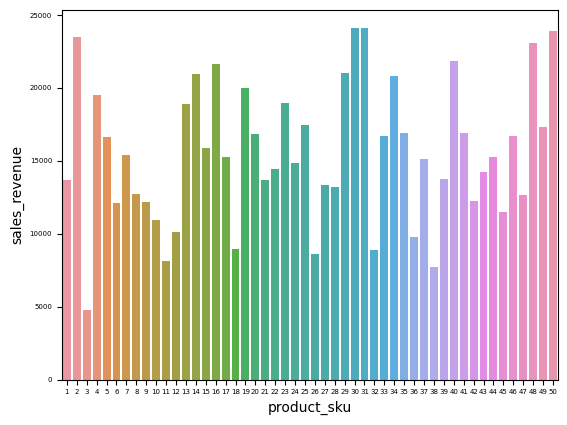

In [566]:
t = sns.barplot(x='product_sku',y='sales_revenue',data=df, estimator=sum, errorbar=None)
t.tick_params(labelsize=5)


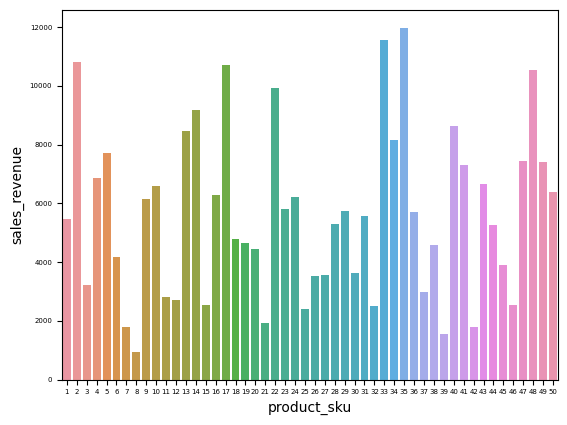

In [567]:
t = sns.barplot(x='product_sku',y='sales_revenue',data=df_2022, estimator=sum, errorbar=None)
t.tick_params(labelsize=5)

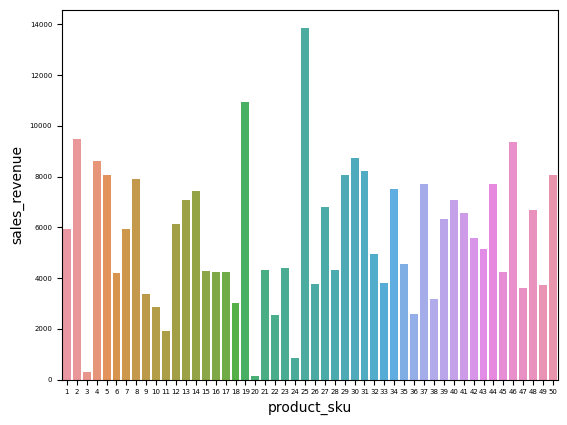

In [568]:
t = sns.barplot(x='product_sku',y='sales_revenue',data=df_2023, estimator=sum, errorbar=None)
t.tick_params(labelsize=5)

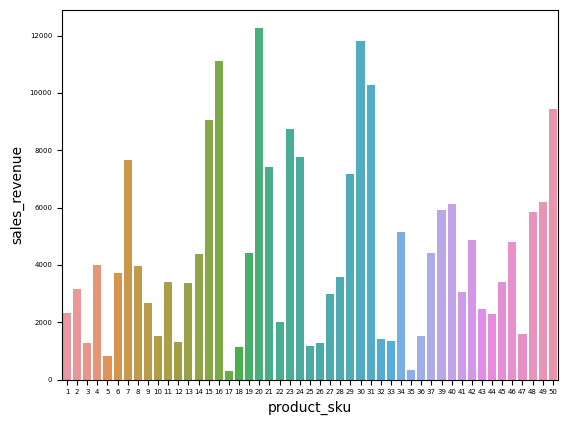

In [565]:
t = sns.barplot(x='product_sku',y='sales_revenue',data=df_2024, estimator=sum, errorbar=None)
t.tick_params(labelsize=5)

# Step 3d Why are some products and regions doing better or worse regarding sales revenue?

I plan to get more granular data for the Regional Sales Managers and the VP of Sales to create some specific recommendations.

While answering the other questions will be simple, this question is more granular.

This is because a product could be doing well. After all, it is popular among many regions, or it could be sold by regions that have a good sales strategy. On the other hand, a region could be doing well because it has a good sales strategy or because it has popular products.

Firstly, we must determine which regions sell which products and display this data in a pivot table.

Secondly, we need to analyze not only sales revenue to analyze the data on a units_sold and price_per_unit basis.

Thirdly an average of each all regions sales_revenue, units_sold, and price_per_unit should be taken for each product. This should be outputted as Company Wide Average for Product_X sales_revenue, units_sold, price_per_unit for all products.

Lastly a column for all regions compares to the average in terms of percentage (Region X sales_revenue for Product_X – Company Average sales revenue for Product_X divided by Company Average sales revenue for Product_X). This will be repeated for units_sold and price_per_unit for all products. This would create three differential statistics explaining whether a value was above or below the average. 

Further exploration could look into finding the standard deviations for all this data. Then dividing by the standard deviation could yield the z-score. This could return the probability. This could be used to calculate the likelihood of whether Product X in Region X has a unit price higher than $200. Furthermore, a confidence interval could be created to predict that the subsequent sale of Product X in Region X would be between a specific lower bound price and upper bound price to a Y% of confidence. 

There are 8 basic scenarios for the combination of the differential statistics. These scenarios along with the regional manager recommndations for each scenario along with the VP of Sales recommndation for each scenario are also listed on the document.

In [569]:
p = df.pivot_table(index='product_sku', columns='region', values=['Dif_sales_revenue',
                                                                  'Dif_price_per_unit', 
                                                                  'Dif_units_sold'])
p

Dif_price_per_unit                                           
region                      1         2         3         4         5    
product_sku                                                              
1                     0.038431 -0.087647  1.262358 -0.357414  0.029756  \
2                    -0.602890  0.447483  0.114073  0.692639       NaN   
3                          NaN  0.001060 -0.728493       NaN       NaN   
4                    -0.905674       NaN -0.020678  0.756579 -0.212037   
5                    -0.213357 -0.104139  0.957311  0.807180  0.292478   
6                     0.163561 -0.190106       NaN -0.127095  3.013675   
7                    -0.244121 -0.484003 -0.459478 -0.478827       NaN   
8                          NaN       NaN       NaN -0.542491       NaN   
9                    -0.280121  2.331497 -0.054488       NaN -0.650007   
10                    0.230241 -0.078854  0.230241 -0.071034  3.590456   
11                         NaN       NaN  0.897485       NaN  0.292488   
12                   -0.624182  0.096821 -0.096810       NaN -0.096810   
13                   -0.509237 -0.920546 -0.141392       NaN  0.057628   
14                   -0.198728 -0.798202       NaN       NaN -0.117570   
15                   -0.580913       NaN       NaN -0.003777 -0.195278   
16                   -0.990657  0.664893 -0.573180  3.215835 -0.603419   
17                   -0.272064 -0.041734 -0.768313 -0.130199  0.571959   
18                         NaN  0.330661 -0.054667 -0.808755  0.082585   
19                   -0.083152  0.225666 -0.569740  0.108111       NaN   
20                   -0.003555  0.290931 -0.150222       NaN -0.122513   
21                   -0.143733 -0.735742 -0.394400  0.896297  0.184403   
22                   -0.033340  1.806409       NaN -0.396486       NaN   
23                         NaN  0.781005 -0.367593  0.560927 -0.481735   
24                         NaN  0.288458       NaN -0.998043  1.558270   
25                         NaN -0.070930  0.485397 -0.113741  0.381769   
26                         NaN  0.254912 -0.253385 -0.640470       NaN   
27                   -0.571033  2.494382 -0.627302  0.300106 -0.039610   
28                         NaN       NaN  0.154813 -0.496778       NaN   
29                   -0.195763 -0.024149 -0.614306 -0.258850  0.159549   
30                    0.355710 -0.706905  0.082567 -0.166366       NaN   
31                         NaN  0.645156 -0.878196  0.367849  0.005746   
32                         NaN  0.041862 -0.196793  0.577482  0.462197   
33                   -0.426644       NaN -0.037469 -0.091537 -0.939595   
34                   -0.303028  0.234143 -0.709908 -0.147380       NaN   
35                    0.889152 -0.608657 -0.942533 -0.108378 -0.651252   
36                   -0.193807  0.443762  0.406048 -0.471282 -0.309064   
37                    0.118284       NaN -0.135449  1.286806 -0.396319   
38                         NaN  2.520521 -0.581775       NaN -0.393418   
39                   -0.358628  0.471860 -0.801500  1.000578 -0.961725   
40                   -0.867985       NaN -0.879849 -0.377402  0.903123   
41                    1.137488  0.493734  0.004554 -0.679407  0.006380   
42                   -0.913006       NaN -0.050062 -0.050062 -0.031156   
43                    0.030248 -0.680780       NaN -0.909215  0.591736   
44                   -0.717880 -0.925064       NaN -0.311623 -0.155153   
45                   -0.374900 -0.785332 -0.332703  2.113039  0.194334   
46                    0.218234  0.238933 -0.483095 -0.019164       NaN   
47                         NaN       NaN  0.790203 -0.779365 -0.636826   
48                         NaN -0.839654  0.992031 -0.121779 -0.296308   
49                   -0.292383  0.949906       NaN -0.532519 -0.044778   
50                    0.527610  0.494132 -0.694630 -0.428011 -0.987588   

                                                               ...   
region             

This a summary table of all differential statistics with product as the index and region as the column. I thought it would be hard to match the scenario with the word document provided so I created a handy tool below.

In [570]:
regioninput = input("Welcome Regional Manager. Please enter your region between 1 to 10")
regiondataframe= "df_" + str(regioninput)
print(regiondataframe)
type(regiondataframe)

df_5


str

This tool prompts the regional manager or the VP of Sales to input a specfic number for the region they want to isolate for. The functions below just check the type and print the df to ensure the right number was entered.

In [571]:
regiondataframe = df[df["region"]==int(regioninput)]
regiondataframe

,region,product_sku,price_per_unit,units_sold,sale_date,year_sold,month_sold,quarter_sold,sales_revenue,CW_units_sold,CW_price_per_unit,CW_sales_revenue,Dif_sales_revenue,Dif_price_per_unit,Dif_units_sold,mtr_sales_revenue,mtr_price_per_unit,mtr_units_sold
324,5,23,61.26,9.000000,2022-11-21,2022,11,4,551.340000,10.756078,110.870000,1185.405933,-0.534894,-0.447461,-0.163264,-1,-1,-1
681,5,40,287.20,5.000000,2023-11-13,2023,11,4,1436.000000,9.005721,145.816471,1283.889598,0.118476,0.969599,-0.444797,1,1,-1
570,5,29,305.43,10.000000,2023-07-25,2023,7,3,3054.300000,9.674771,122.687778,1166.638986,1.618034,1.489490,0.033616,1,1,1
549,5,27,138.34,12.000000,2023-07-04,2023,7,3,1660.080000,10.756078,78.374375,833.419064,0.991891,0.765118,0.115648,1,1,1
697,5,29,78.13,10.048626,2023-11-29,2023,11,4,785.099133,9.674771,122.687778,1166.638986,-0.327042,-0.363180,0.038642,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,5,42,142.57,8.000000,2023-10-18,2023,10,4,1140.560000,9.696617,82.247500,767.192413,0.486667,0.733427,-0.174970,1,1,-1
911,5,21,34.17,10.048626,2024-06-30,2024,6,2,343.361543,10.938991,95.285714,977.913732,-0.648884,-0.641394,-0.081394,-1,-1,-1
658,5,21,257.41,9.000000,2023-10-21,2023,10,4,2316.690000,10.938991,95.285714,977.913732,1.369013,1.701454,-0.177255,1,1,-1
407,5,1,78.94,16.000000,2023-02-12,2023,2,1,1263.040000,9.842105,76.658947,721.047895,0.751673,0.029756,0.625668,1,1,1


Then the region dataframe and regionipnut variables are used to create a df that is isolated for the specific region entered in the input.

In [576]:
p = regiondataframe.pivot_table(index='product_sku', columns='region', values=['Dif_sales_revenue',
                                                                  'Dif_price_per_unit', 
                                                                  'Dif_units_sold'])
p

,Dif_price_per_unit,Dif_sales_revenue,Dif_units_sold
region,5,5,5
product_sku,,,
1,0.029756,0.751673,0.625668
4,-0.212037,-0.095355,0.022392
5,0.292478,0.086734,-0.213456
6,3.013675,4.047903,0.377021
9,-0.650007,-0.455052,0.149621
10,3.590456,3.465206,0.056281
11,0.292488,0.186556,-0.068312
12,-0.096810,-0.321430,-0.214286


Then a summary pivot table with the differential statistics for the single region for each product as the index is sprinted. This will allow the manager and VP of sales to directly compare the scenarios with the ones on the word document. If a product is missing then that product is not sold by that region.

Running through the tool with input(5)

product_sku 1 is of the high/high/high scenario 

This entails that means region_5 can extract a higher value with a higher volume of product_1 which is a result of a good strategy and high demand for product_1 as the sales revenue of product_1 in Region_5 is above average 

Therefore managers continue implementing this strategy as it is working, and note that this product is highly desired

Therfore VP should reward this manager as they implemented a unique strategy for this product and think about expanding this product to other regions based on overall sales_revenue

Looking back at step 3c product 1 has mid to low range sales comparatively to the rest of the product. Furthermore, in 2024 it is not doing the best based on the data year to date as it only slighlty above 2000 units. Thereofre all this is a good product for Region_5 it is not fit for expansion into the 2025 year.

product_sku 2 is not on the list which indicates that it is not being sold by Region 5

Looking at step 3c you can see that the product 2 although overall better than product one is a mid range product. Furthmore, product 2 has steadily been decreasing over the years based on the graphs from 2022 to 2024. Therefore, in 2025 this is not a product region 5 should adopt as a part of its sales strategy for 2025 year.

product_sku 4 is of the low/low/high scenario 

According to the table this demonstrates region 5 is undercharging for Product_4, causing customers who would have paid at a higher price to obtain it for cheaper as the units_sold is above average in product_4 while the sales_revenue and price_per_unit for product_4 in region_5 is below average.

Therefore the manger should lower the volume for this product and increase the price as then you can increase sales_revenue. This makes sense as the product is currently being bought hire the average meaning its in demand; however, Region 5 cannot extract value out of that product.

Furthemore, the VP of sales needs to train this manager as they need to know when to increase price and lower volume of a product.

Looking back at 3c product_4 was doing well in 2022 and has since declined being at a sales value of approximaetly 4000. However it is still able to generate decent sales for the company so maybe the sales pitch, marketing, or target audience should be changed in order to gain more value.

As shown by combining this tool along with the graph from 3c insights that are generated from both the breadth and depth of analysis are creating powerful recommendations for just 3 products for one region of the company.

<Axes: xlabel='year_sold', ylabel='sales_revenue'>

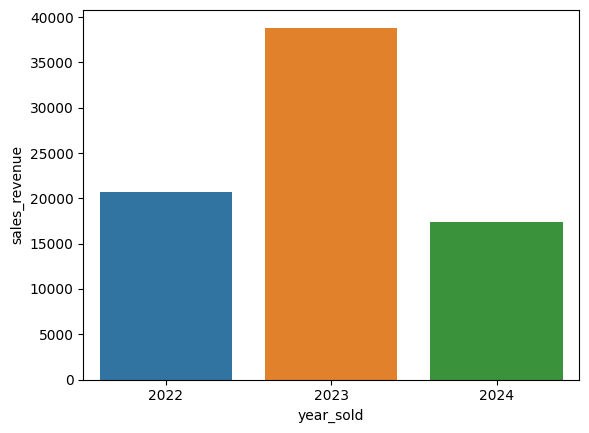

In [577]:
sns.barplot(x='year_sold',y='sales_revenue',data=regiondataframe, estimator=sum, errorbar=None)

With this code the oupt of the region's sales_revenue by year bar graph will be displayed.

For region 5 it is clear that 2023 was its best year as discovered in the previous analysis.

<Axes: xlabel='month_sold', ylabel='sales_revenue'>

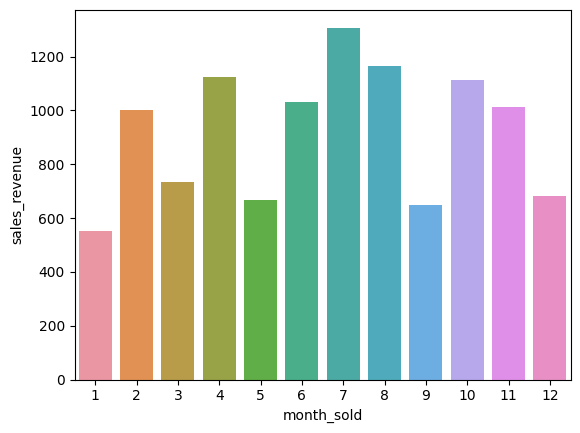

In [579]:
sns.barplot(x='month_sold',y='sales_revenue',data=regiondataframe, errorbar=None)


With this code the oupt of the region's sales_revenue by month bar graph will be displayed.

For region 5 it is clear that July, Augustm and October are its best months. IT is also clear that January, May, and September are the worst months.

<Axes: xlabel='quarter_sold', ylabel='sales_revenue'>

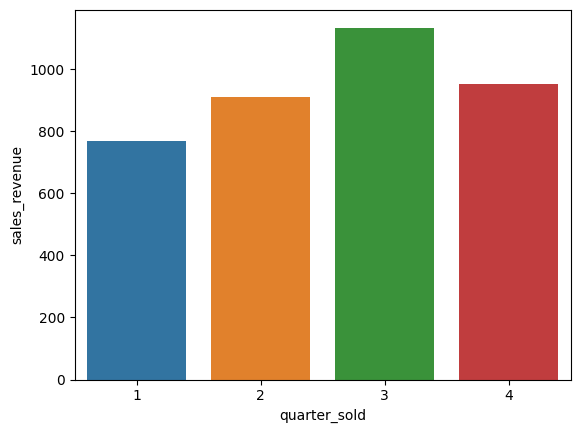

In [581]:
sns.barplot(x='quarter_sold',y='sales_revenue',data=regiondataframe, errorbar=None)


With this code the oupt of the region's sales_revenue by quarter bar graph will be displayed.

It is clear that quarter 3 is the best quarter on average; however, note that it could change with the availbilty of data.


To summarize this Assignment:

We were provided a sales_data.csv for an ecommerce company with a goal of recommending several insights for their strategy next year.

While answering the following questions:

1) What conclusions can you draw about sales performance of various products and regions?

2) What recommendations do you have for the business?

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

I started off this assignment by stating three steps.

I used step 1 Cleaning the Data to answer question 3. I described my data cleaning approach through the annotation all the cells for ease of use for a future data scientist to pick off where I left of.

I used step 2 to partially answer question 3 by futher demonstratng my ability to manipulate the data.

Then I used step 3a to ouptut some basic summary statistics to get overall conclusions about sales performancee of various projects and regions.

I used step 3b to further build upon recommendations by turning strategic insights into recommendations that can be easily acted upon.

I then used step 3c and 3d to show how specific points and data insights can be combined with overall picture of data to demonstrate recommendations that use both eh breadth and depth of my data analysis.

Overall I hope throghout this process I have not only recommended strategic insights for regional sales managers and the VP of Sales but also provided a tool along with a word document that will easily guide both managers along with the VP to create insights along with recommendations of their own. Lastly, I hope that a data scientist hired by the company can further build upon my work to create a more efficient sales strategy by setting up better data reporting standards.